In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

A frequency table allows us to summarize from a large dataset. For instance, suppose we have a table that shows the marks achieved by 1000 students for a particular subject, as shown in the table below. Due to the amount of data we have, it is impossible to analyze the data one by one. However, we can summarize this by converting them into _categorical variables_, and identify the occurence of each category.

In [208]:
grades = np.random.poisson(50,1000)
df_grades = pd.DataFrame(grades,columns=['Marks'])

df_grades

,Marks
0,51
1,44
2,58
3,67
4,46
...,...
995,41
996,43
997,39
998,53


In [209]:
labels = list('ABCDEF')
labels.reverse()
grades_binned = pd.cut(grades,labels=labels,bins=len(labels))

df_grades_categorical = pd.DataFrame(grades_binned.value_counts(),columns=['Frequency'])
df_grades_categorical.index.rename('Grades',inplace=True)

total = pd.DataFrame(len(grades),columns=['Frequency'],index=['Total'])
df_grades_categorical.append(total)

,Frequency
F,26
E,190
D,367
C,305
B,100
A,12
Total,1000


As we can see, by summarizing them into the number of occurences, we get a better picture. We can further improve this by converting them into percentages, or even plotting a histogram.

In [210]:
df_grades_categorical['Frequency'] *= 100 / len(df_grades)
df_grades_categorical['Frequency'] = df_grades_categorical['Frequency'].apply(lambda x : '{:.2f}%'.format(x))
df_grades_categorical = df_grades_categorical.append(total)
df_grades_categorical.iloc[-1] = '100%'

df_grades_categorical

,Frequency
F,2.60%
E,19.00%
D,36.70%
C,30.50%
B,10.00%
A,1.20%
Total,100%


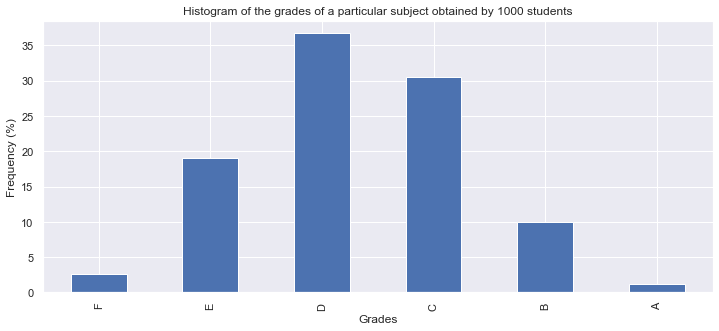

In [211]:
plt.figure(figsize=(12,5))
percentages = df_grades_categorical['Frequency'].apply(lambda x : x.replace('%','')).astype(np.float64)
percentages.iloc[:-1].plot(kind='bar')
plt.xlabel('Grades')
plt.ylabel('Frequency (%)')
plt.title('Histogram of the grades of a particular subject obtained by 1000 students')
plt.show()

As we can see, it is easier for us to visualize the results with a histogram/frequency table. We can see that the majority of the students have obtained Cs and Ds for the subject. In this case, we can conclude that this subject may be a difficult subject for most students as the frequency for A grade is less than 5%, and the frequency for C and D grades are quite high.

In contrast to frequency tables which concerns one variable, _contingency tables_ (or _cross tabulation/crosstabs_) are similar to the frequency table, but it is concerned with two or more variables. Suppose we want to see how chocolate consumption in grams per week affects body weight:

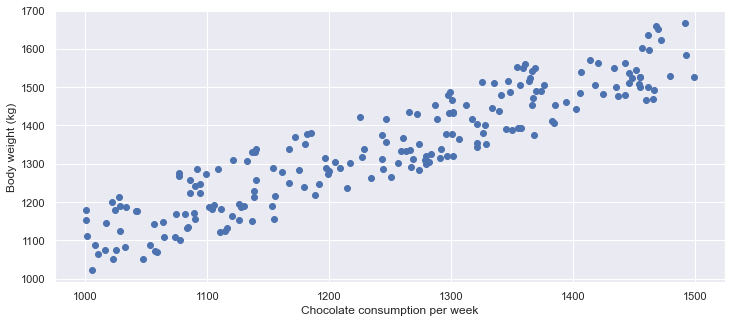

In [281]:
chocolates_per_wk = np.random.uniform(150,100,200) * 10
body_weight_kg = np.random.uniform(200,0.5,200) + chocolates_per_wk

plt.figure(figsize=(12,5))
plt.scatter(chocolates_per_wk,body_weight_kg)
plt.xlabel('Chocolate consumption per week')
plt.ylabel('Body weight (kg)')
plt.show()

In [442]:
rows = ['< 50','50 - 69','70 - 89','>= 90']   # Body weight
cols = ['< 50','50 - 150','> 150']   # Chocolate consumption

df = pd.DataFrame({'chocolates_per_wk':chocolates_per_wk,'body_weight (kg)':body_weight_kg})
body_weight_bins = pd.cut(body_weight_kg,labels=cols,bins=len(cols))
chocolate_bins = pd.cut(chocolates_per_wk,labels=rows,bins=len(rows))

cross_tab = pd.crosstab(body_weight_bins,chocolate_bins)

total_weight = [cross_tab.iloc[idx].sum() for idx in range(len(cross_tab))]
total_consumption = dict([(cross_tab.columns[idx],cross_tab.T.iloc[idx].sum()) for idx in range(len(cross_tab.T))])
total_weight.append(200)

In [443]:
cross_tab = cross_tab.append(pd.DataFrame(total_consumption,['Total']))
cross_tab.insert(len(cross_tab.columns),'Total',total_weight,True)
cross_tab.index.name = 'Chocolate consumption (grams)'
cross_tab.columns.name = 'Body weight (kg)'
cross_tab

Body weight (kg),< 50,50 - 69,70 - 89,>= 90,Total
Chocolate consumption (grams),,,,,
< 50,44,12,0,0,56
50 - 150,9,32,44,3,88
> 150,0,0,20,36,56
Total,53,44,64,39,200


As we can see, using a contingency table allows us to show a summary similar to the frequency table, but with two variables. We can further improve it by representing the values as percentages, which allows us to compare relative to each other. In the improved contingency table below, we can see that most of the people who has consumped more than 150 grams of chocolate are heavier than 90kg.

In [445]:
cross_tab.applymap(lambda x : '{:.2f}%'.format(x  / 200 * 100))

Body weight (kg),< 50,50 - 69,70 - 89,>= 90,Total
Chocolate consumption (grams),,,,,
< 50,22.00%,6.00%,0.00%,0.00%,28.00%
50 - 150,4.50%,16.00%,22.00%,1.50%,44.00%
> 150,0.00%,0.00%,10.00%,18.00%,28.00%
Total,26.50%,22.00%,32.00%,19.50%,100.00%
